# feature scailing (feature간의 최대-최소값의 차이를 맞춘다)

- Min-Max Normalization
  - 기존 변수에 범위를 새로운 최대-최소로 변경
  - 일반적으로 0과 1사이 값으로 변경
  
- Standardization(Z-score normalization)
  - 기존 변수에 범위를 정규 분포로 변환
  - 실제 Min-Max의 값을 모를 때 활용가능

> 실제 사용할 때는 반드시 정규화 Parameter(최대/최소, 평균/표준편차)등을 기억하여 새로운 값에 적용 (값들이 바뀔 수도 있기 때문)


In [1]:
def faeture_scaling(df, scalin_Strategy = 'min-max', column = None):
    if column == None:
        column = [column_name for column_name in df.columns]
    for column_name in column:
        if scalin_Strategy == 'min-max':
            df[column_name] = (df[column_name] - df[column_name].min()) / (df[column_name].max() - df[column_name].min())
        elif scalin_Strategy == 'z-score':
            df[column_name] = (df[column_name] - df[column_name].mean()) / (df[column_name].std())
    return df

## Feature scaling with sklearn

- MinMaxScaler와 StandardScaler 사용
- Preprocessing은 모두 fit -> transform의 과정을 거침  
-> 이유 : label encoder와 동일
- 단, scaler는 한번에 여러 column을 처리 가능

In [5]:
import pandas as pd
import os


In [6]:
DATA_DIR = '../data'
txt = os.path.join(DATA_DIR, "dataprepro.txt")
df = pd.read_csv(txt, sep=',', header=None, usecols=[0,1,2])

df.columns = ['Class label', 'Alcohol', 'Malic acid']
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [7]:
df1 = faeture_scaling(df, 'min-max', column = ['Alcohol','Malic acid'])
df1.head()

,Class label,Alcohol,Malic acid
0,1,0.842105,0.191700
1,1,0.571053,0.205534
2,1,0.560526,0.320158
3,1,0.878947,0.239130
4,1,0.581579,0.365613


In [8]:
from sklearn import preprocessing

# 두개의 column이 들어가 있음 !
std_scaler = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
std_scaler

StandardScaler()

In [9]:
std_scaler.scale_

array([0.21303761, 0.22015882])

In [13]:
df_std = std_scaler.transform(df[['Alcohol','Malic acid']])
df_std[:10]

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377],
       [ 1.48155459, -0.51736664],
       [ 1.71625494, -0.4186237 ],
       [ 1.3086175 , -0.16727801],
       [ 2.25977152, -0.62508622],
       [ 1.0615645 , -0.88540853]])

In [15]:
minmax_scaler= preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
minmax_scaler.transform(df[['Alcohol', 'Malic acid']])[:10]

array([[0.84210526, 0.1916996 ],
       [0.57105263, 0.2055336 ],
       [0.56052632, 0.3201581 ],
       [0.87894737, 0.23913043],
       [0.58157895, 0.36561265],
       [0.83421053, 0.20158103],
       [0.88421053, 0.22332016],
       [0.79736842, 0.27865613],
       [1.        , 0.17786561],
       [0.74473684, 0.12055336]])

# feature engineering (가장 적합한 특성을 찾는 것)

## Generation
- one-hot encoding
- label encoding
- scaling (normalization)
- Interaction feature
- Log transformation  
※ 대부분의 데이터는 정규분포가 아니고 long-tail data
## Selection
- 코드적으로 설명이 힘듦

### Log transformation
- 데이터의 분포가 극단적으로 모였을 때 Ex : poisson(선형 모델은 데이터가 정규분포 때 적합)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [17]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3)

X = rnd.poisson(10*np.exp(X_org))
y = np.dot(X_org, w)

Text(0.5, 0, 'Value')

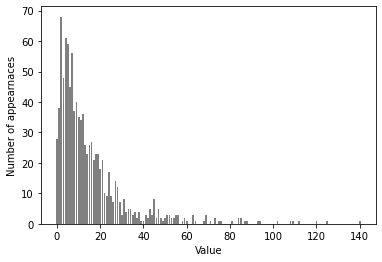

In [18]:
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)), bins, color = 'grey')
plt.ylabel('Number of appearnaces')
plt.xlabel('Value')

In [19]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# R square
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print(f"Test score : {score}")

Test score : 0.6224186236310756


Text(0.5, 0, 'Value')

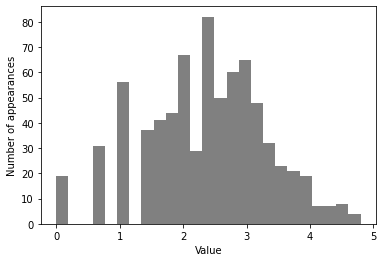

In [20]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

plt.hist(X_train_log[:,0], bins=25, color = 'gray')
plt.ylabel('Number of appearances')
plt.xlabel('Value')

In [21]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:3f}".format(score))

Test score: 0.874934


## Mean encoding
- Category 데이터는 one-hot encoding 이외에도 다양한 인코딩 기법이 있음
- 대표적인 방법으로 Y값에 대한 분포를 활용한 Mean Encoding
- 비율을 통해 분포를 나타냄

![mean_encoding](../../img/mean_encoding_1.png)
![mean_encoding](../../img/mean_encoding_2.png)

- 일반적으로 조금 더 빠르고 더 나은 성능이 나옴
- Overfitting 제거를 위해 Smoothing을 사용하기도 함

## example of titanic by mean-encoding

In [22]:
data_files = reversed([os.path.join('..', 'data', 'titanic', filename) for filename in os.listdir('../data/titanic')])
df_list = []
for filename in data_files:
    df_list.append(pd.read_csv(filename))
# 모판 만들기(한판으로)
df = pd.concat(df_list, sort = False)
# 중복되는 index발생 => reset_index로 처리
# 인덱스가 출력되지 않도록 : drop = True
df = df.reset_index(drop = True)

number_of_train = df.Survived.notnull().sum()
y = df.pop('Survived')[:number_of_train]


In [23]:
def merge_and_get(ldf, rdf, on, how = "inner", index = None):
    if index is True :
        return pd.merge(ldf, rdf, how = how, left_index = True, right_index = True)
    else:
        return pd.merge(ldf, rdf, how = how, on=on)

In [24]:
one_hot_df = merge_and_get(
    df, pd.get_dummies(df['Sex'], prefix = 'Sex'), on =None, index=True) # sex_modified, index를 기준으로

one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(df['Pclass'], prefix='Pclass'), on = None, index=True)

one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(df['Embarked'], prefix='Embarked'), on = None, index=True)

In [25]:
temp_df = pd.merge(one_hot_df['Pclass'], y, left_index=True, right_index=True)

# 각 class별로 생존의 비율(가중치?)로 표현
temp_df.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [27]:
temp_df['Pclass'].replace(
    temp_df.groupby('Pclass')['Survived'].mean())

0      0.242363
1      0.629630
2      0.242363
3      0.629630
4      0.242363
         ...   
886    0.472826
887    0.629630
888    0.242363
889    0.629630
890    0.242363
Name: Pclass, Length: 891, dtype: float64

## Interaction features
- 기존 feature들의 조합으로 새로운 feature 생성
- 여러가지 feature를 합쳐서 사용
- Data에 대한 사전 지식과 이해 필요
- Polynomial feature를 사용한 자동화 가능 => 높은 비용
- weight + time-period, sensor1 + sensor2

> ex: 마당의 width와 height의 곱이 각각의 독립적인 효과보다 집값 예측에 더 효과적

In [32]:
import seaborn as sns

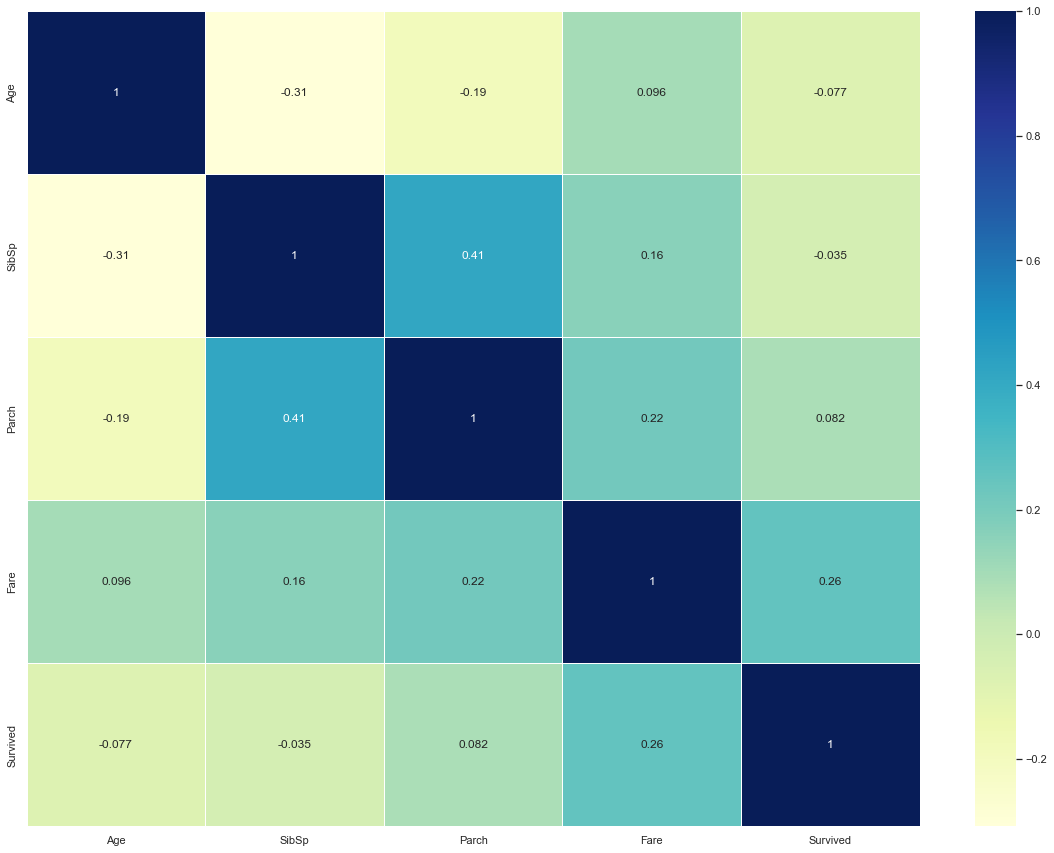

In [35]:
numeric_columns = ["Age","SibSp","Parch","Fare"]
temp_df_1 = pd.merge(one_hot_df[numeric_columns], y, left_index=True, right_index=True)

corr = temp_df_1.corr()
sns.set()
plt.subplots(figsize = (20,15))
ax = sns.heatmap(corr, annot=True, linewidths=.8, cmap = "YlGnBu")